<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/cv_with_dl/3_Channel_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Channel Convolution 1

**학습 목표**

* CNN의 구조와 Convolution 연산이 무엇인지 알아봅시다.
* Convolution 연산의 목적에 대해 알고, Padding의 필요성을 설명할 수 있습니다.
* Filter의 중요성을 알아보고, 코드를 통해 다양한 Filter를 이미지에 직접 적용해 봅시다.
* Convolution 연산을 계속해서 진행하면 깊은 layer를 쌓는데 문제점이 발생하는 데 이를 해결하는 방법을 알아봅시다.

**Q. CNN(Convolution Neural Network)의 구조를 설명해 보세요.**
```
CNN 구조는 크게 Feature extraction과 Classification으로 구성됩니다. Input이 들어가면 먼저 Convolution 연산과 Pooling을 여러 번 반복하여 Feature extraction을 한 후 1D 데이터인 flatten layer로 만듭니다. 마지막으로 Fully connected layer(MLP)를 통해 classification을 합니다.
```

**Q. Convolution 연산에 대해서 설명해 보세요.**
```
Convolution 연산은 Input에 kernel을 over-riding하여 겹쳐지는 숫자를 곱하여 그 값을 더하는 것입니다. stride를 1로 지정하여 Convolution 연산을 반복하면 feature map이 나옵니다.
```

**Q. hidden layer의 개수가 늘어날수록 다양하고 복잡한 패턴을 찾을 수 있습니다. 어떻게 하면 더 많은 layer를 쌓을 수 있을까요? 어떤 방법을 사용하면 될까요?**
```
더 많은 layer를 쌓을 수 있는 해결책은 padding을 사용하는 것입니다. padding은 Filter을 적용하기 전에 보존하려는 Feature map 크기에 맞게 입력 Feature Map의 좌우 끝과 상하 끝에 각각 열과 행을 추가한 뒤, 0 값을 채워 입력 Feature map 사이즈를 증가시킵니다.
```

### Filter & Convolution Operation

**Import Data**

In [ ]:
# Modules

import numpy as np
from scipy.signal import convolve2d
from skimage.io import imread, imshow
from skimage.color import rgb2gray

In [ ]:
cat = rgb2gray(imread('data/cat.jpg'))

In [ ]:
cat.shape

(3266, 4899)

In [ ]:
cat

array([[0.81598392, 0.80814078, 0.88293333, ..., 0.08751843, 0.11104784,
        0.11104784],
       [0.76500353, 0.77284667, 0.8434349 , ..., 0.06624392, 0.08977333,
        0.0936949 ],
       [0.78853294, 0.81206235, 0.84735647, ..., 0.04830275, 0.07800863,
        0.08977333],
       ...,
       [0.70269882, 0.67132627, 0.69877725, ..., 0.87116863, 0.86724706,
        0.87901176],
       [0.64753686, 0.6601349 , 0.67860392, ..., 0.89441529, 0.88265059,
        0.87480745],
       [0.64361529, 0.6601349 , 0.67468235, ..., 0.88265059, 0.87088588,
        0.86304275]])

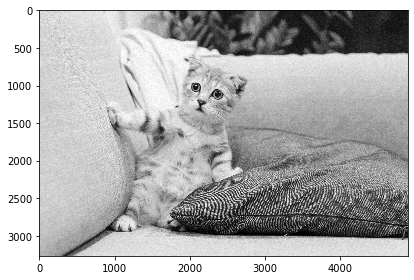

In [ ]:
imshow(cat)

**Apply Filter**

In [ ]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

**Edge Detection**

* 이미지에서 대상 객체의 윤곽을 감지하고 강조하는 데 사용됩니다.
* 이미지에서 픽셀 간의 갑작스러운 강도 변화로 정의됩니다.
* 주요 에지 검출 알고리즘에는 Sobel, Canny, Roberts, Prewitt 등이 있습니다.
* 객체 인식, 객체 추적, 이미지 분할 등과 같은 응용 분야에서 중요한 전처리 단계입니다.

In [ ]:
edge_im = convolve2d(cat, edge, 'valid')

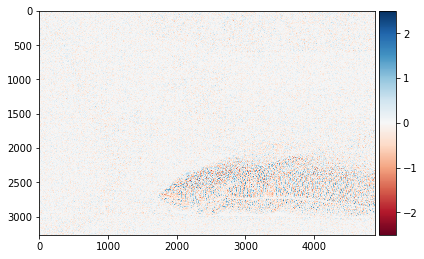

In [ ]:
imshow(edge_im)

**Sharpen**

* 이미지의 세부 사항을 강조하거나 개선하는 데 사용됩니다.
* 이미지를 더 뚜렷하게 만들어 주는 필터를 적용하여 이미지의 세부 사항을 강조합니다.
* 주요 선명화 필터에는 Unsharp Masking 및 High-Pass Filtering이 포함됩니다.
* 이미지 개선, 엣지 강조, 텍스트 인식 등에서 유용합니다.

In [ ]:
sharp_im = convolve2d(cat, sharpen, 'valid')

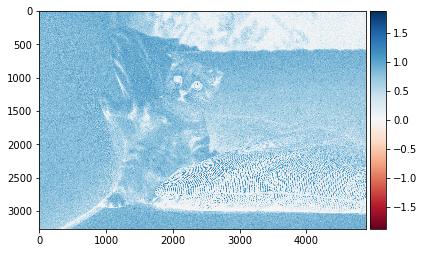

In [ ]:
imshow(sharp_im)

**Gaussian Blur**

* 이미지를 부드럽게 만들고 노이즈를 제거하는 데 사용됩니다.
* 이미지의 각 픽셀 값을 주변 픽셀의 가중 평균으로 대체하여 부드러운 효과를 생성합니다.
* 주요 용도로는 이미지 노이즈 제거 및 세부 사항을 완화하는 것이 있습니다.
* 이미지 스무딩 또는 블러링 효과를 생성하는 데 유용합니다.

In [ ]:
from scipy.ndimage import gaussian_filter
from scipy import misc

sigma = 1.5
blur_im = gaussian_filter(cat, sigma=sigma)

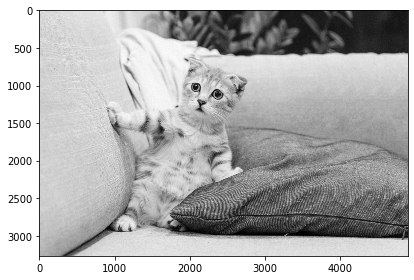

In [ ]:
imshow(blur_im)